### 🔴 Exploratory Data Analysis on 'hate_speech.csv' (Hate Speech Twitter Dataset)

Here we are -
1. Loading and understanding the dataset
2. Analyzing class distribution
3. Extracting basic cleaning insights
4. Visualizing word counts, label frequencies etc.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enabling inline plotting in the notebook
%matplotlib inline

# Setting a consistent style for plots
sns.set(style="whitegrid")

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the Dataset

df = pd.read_csv("/Users/ratulmukherjee/Desktop/Hate Speech Detection/data/hate_speech.csv")
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
# Basic Stats for Numeric Columns
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
# Checking for Missing Values
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [ ]:
# Check Label Distribution
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

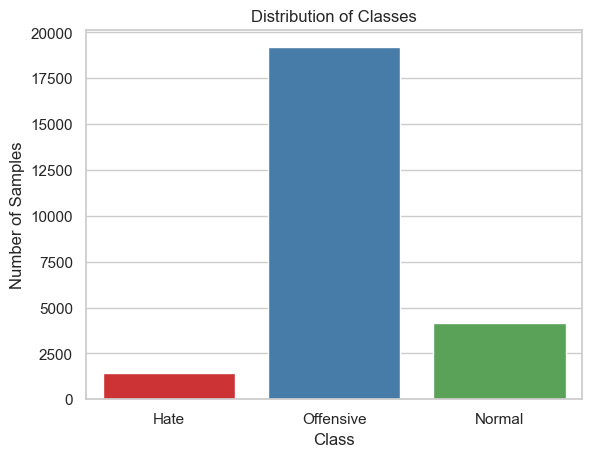

In [ ]:
# Visualizing Class Distribution
sns.countplot(x='class', data=df, palette='Set1')
plt.title("Distribution of Classes")
plt.xticks(ticks=[0,1,2], labels=["Hate", "Offensive", "Normal"])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# Creating Text Length Feature
df['text_len'] = df['tweet'].astype(str).apply(len)
df['text_len'].describe()

count    24783.000000
mean        85.436065
std         41.548238
min          5.000000
25%         52.000000
50%         81.000000
75%        119.000000
max        754.000000
Name: text_len, dtype: float64

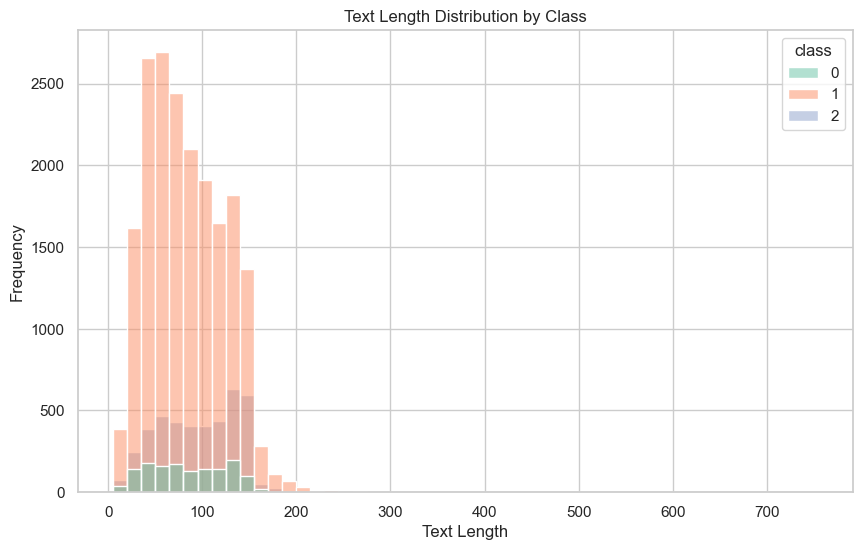

In [15]:
# Visualizing Text Length Distribution by Class
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_len', hue='class', bins=50, palette='Set2')
plt.title("Text Length Distribution by Class")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [17]:
# Printing sample tweets by Class
for c in sorted(df['class'].unique()):
    print(f"\nClass {c} Samples:\n")
    print(df[df['class'] == c]['tweet'].sample(3, random_state=42).values)


Class 0 Samples:

['@AustinG1135 I do not like talking to you faggot and I did but in a nicely way fag'
 'RT @mitchmancuso: @BrantPrintup:What straight guys take a picture of themselves naked in a hot tun.What fags @jakesiwy @Ryan_Murphy3 @Randy&#8230;'
 '@clinchmtn316 @sixonesixband AMERICA today, the rule of thumb is: when in doubt, blame "whitey"']

Class 1 Samples:

['Why is it everytime I go to cracker barrel the girl with great tits that seats you who is your waitress nope its the chick with 2 teeth'
 "Run that nigga, you don't want that nigga, but I need a bad bitch that's hotter than me"
 "I need a girl from Jamaica I can't fuck with these basic black bitches"]

Class 2 Samples:

['RT @chicagotribune: Chicago will not refund $7.7 million made from red light tickets issued after yellow lights were shortened http://t.co/&#8230;'
 'Sometimes, even I gotta tell these hoes to grow up smh'
 '&#8216;Chillin&#8217; With My Homie Or What&#8217;s Left Of Him&#8217;: British Rapper Turne

### EDA Summary -
1. It gives us a clear understanding of class distribution
2. We created a text length feature to engineer
3. We printed examples per class for better context
4. We produced a cleaned and ready-to-use dataset for preprocessing and model building